https://docs.google.com/document/d/1aXMs3yhUWQo1zCAHaAKMWeLcotKM3cvh9-Ao6ED_UrA/edit?usp=sharing

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [4]:
df = pd.read_csv('Crashes.csv')

In [7]:
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LONG BEACH,-118.114876,33.832226
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.172241,34.088795
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.276199,33.938290
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LANCASTER,-118.218719,34.687332


In [9]:
# Incorporate point x and y into lat long
# Step 1: Fill in missing LAT/LON with POINT_X/POINT_Y
df['LONGITUDE'] = df['LONGITUDE'].fillna(df['POINT_X'])
df['LATITUDE'] = df['LATITUDE'].fillna(df['POINT_Y'])

In [11]:
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,0,-,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,0,-,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,0,-,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,0,-,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332


In [13]:
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [15]:
# Step 3: Drop rows missing any critical values (required for analysis)
df = df.dropna(subset=['COLLISION_SEVERITY', 'LATITUDE', 'LONGITUDE'])

df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,0,-,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,0,-,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,0,-,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,0,-,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332


In [17]:
# Step 4: Convert numeric columns properly
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns: 
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 5: Create binary outcome variable for severity
df['IS_SEVERE'] = df['COLLISION_SEVERITY'].apply(lambda x: 1 if x in [1, 2] else 0)

# Step 6: Drop any completely empty rows, and forward-fill where it makes sense
df = df.dropna(how="all")
df = df.ffill() # NOT SURE IF FFILL MAKES SENSE

# Optional: Check missing value status
nan_count = df.isna().sum()
nan_pct = df.isna().sum() / len(df) * 100
print("Number of missing values per column:\n", nan_count)
print("\nPercentage of missing values:\n", nan_pct.round(2), "%")

# Preview cleaned data
df.head()
#print(df['MOTORCYCLE_ACCIDENT'].value_counts(dropna=False))
# set case ID as index (eisha)

# Connect it to tracts data census (abirami)
# produce contextily map for reference with crs 4326

# produce some basic summary stats

Number of missing values per column:
 CASE_ID           0
ACCIDENT_YEAR     0
PROC_DATE         0
JURIS             0
COLLISION_DATE    0
                 ..
COUNTY            0
CITY              0
POINT_X           0
POINT_Y           0
IS_SEVERE         0
Length: 81, dtype: int64

Percentage of missing values:
 CASE_ID           0.0
ACCIDENT_YEAR     0.0
PROC_DATE         0.0
JURIS             0.0
COLLISION_DATE    0.0
                 ... 
COUNTY            0.0
CITY              0.0
POINT_X           0.0
POINT_Y           0.0
IS_SEVERE         0.0
Length: 81, dtype: float64 %


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179,0
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,240,2,5,...,0,-,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226,0
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,-,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795,0
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,-,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290,1
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,-,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332,0


In [24]:
# Step 7: Convert to GeoDataFrame using lat/lon
collision_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']), crs='EPSG:4326')

# Step 8: Read CalEnviroScreen shapefile and filter for LA County
enviroscreen = gpd.read_file('CalEnviroScreen/CES4 Final Shapefile.shp')
enviroscreen = enviroscreen[enviroscreen.County == 'Los Angeles']

# Step 9: Project to same CRS (EPSG:3310)
collision_gdf = collision_gdf.to_crs('EPSG:3310')
enviroscreen = enviroscreen.to_crs('EPSG:3310')

# Step 10: Spatial join — assign each collision to a census tract
collision_gdf = gpd.sjoin(collision_gdf, enviroscreen[['Tract', 'geometry']], how='inner', predicate='intersects')

# Step 11: Calculate total and severe collision counts by tract
total_counts = collision_gdf.groupby('Tract').size()
severe_counts = collision_gdf.groupby('Tract')['IS_SEVERE'].sum()

# Step 12: Combine metrics into one DataFrame
tract_stats = pd.concat([total_counts, severe_counts], axis=1)
tract_stats.columns = ['n_collisions', 'n_severe_collisions']
tract_stats['pct_severe'] = tract_stats['n_severe_collisions'] / tract_stats['n_collisions']

# Step 13: Join stats back to enviroscreen
enviroscreen = enviroscreen.set_index('Tract').join(tract_stats)

# Step 14: Fill tracts with no collisions with 0s
enviroscreen[['n_collisions', 'n_severe_collisions', 'pct_severe']] = enviroscreen[
    ['n_collisions', 'n_severe_collisions', 'pct_severe']
].fillna(0)

# Step 15: Summary checks
print("Rows in collision_gdf after join:", len(collision_gdf))
print("\nSummary of collision metrics:")
print(enviroscreen[['n_collisions', 'n_severe_collisions', 'pct_severe']].describe())

Rows in collision_gdf after join: 39740

Summary of collision metrics:
       n_collisions  n_severe_collisions   pct_severe
count   2343.000000          2343.000000  2343.000000
mean      16.961161             1.918054     0.143476
std       18.977710             2.531633     0.178355
min        0.000000             0.000000     0.000000
25%        5.000000             0.000000     0.000000
50%       11.000000             1.000000     0.093750
75%       23.000000             3.000000     0.200000
max      191.000000            54.000000     1.000000


In [27]:
tract_stats.head()

,n_collisions,n_severe_collisions,pct_severe
Tract,,,
6.037101e+09,3,1,0.333333
6.037101e+09,3,2,0.666667
6.037101e+09,8,0,0.000000
6.037101e+09,20,8,0.400000
6.037102e+09,5,1,0.200000


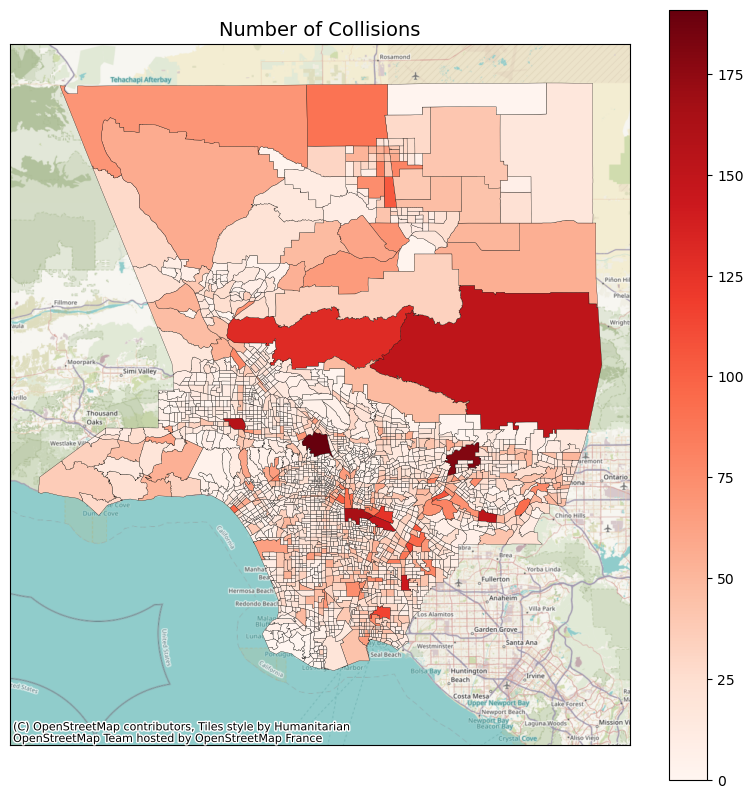

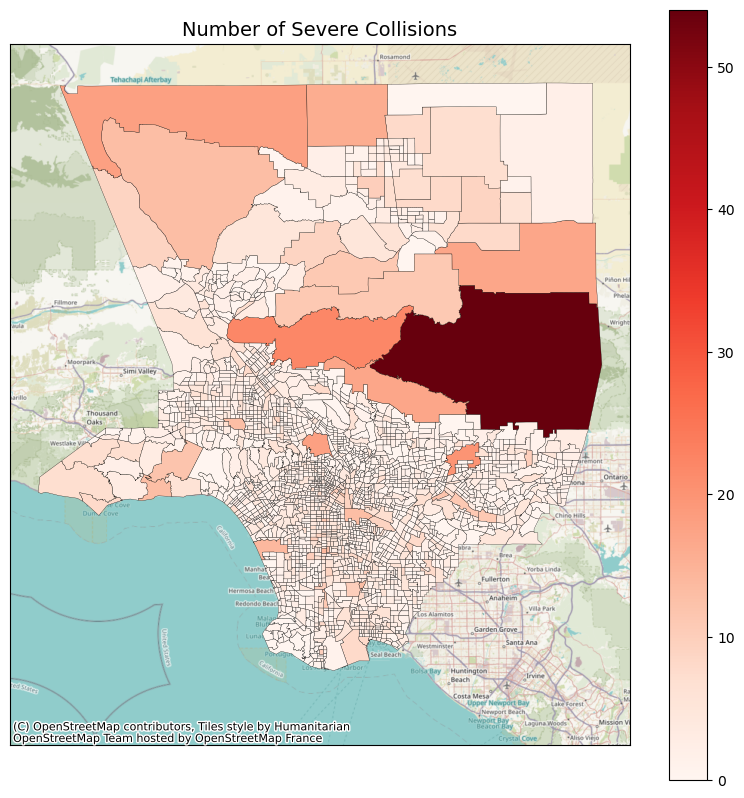

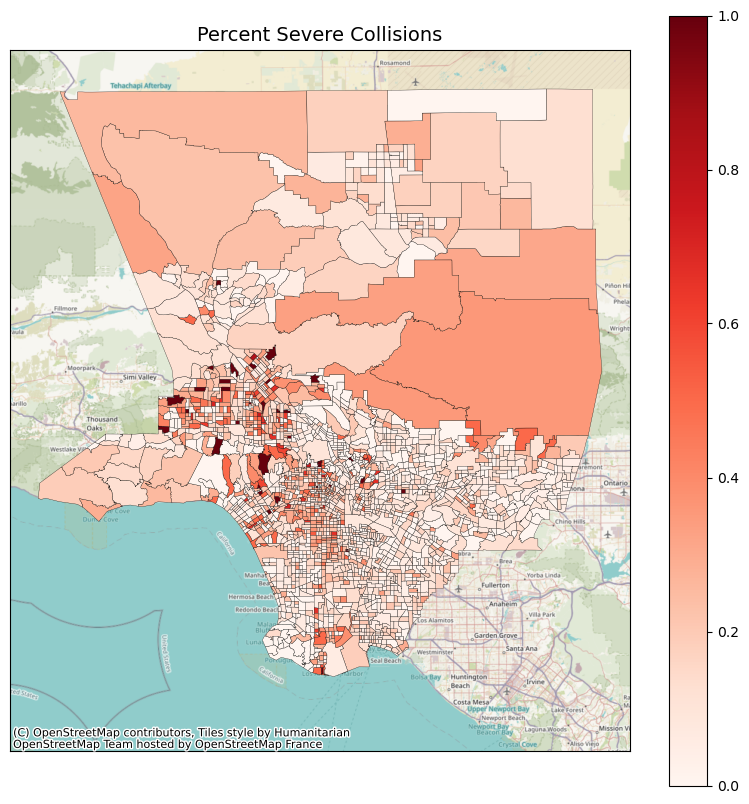

In [21]:
# Reproject Enviroscreen to Web Mercator
enviroscreen_web = enviroscreen.to_crs(epsg=3857)

# Plot maps for each desired column
for column, title in [
    ('n_collisions', 'Number of Collisions'),
    ('n_severe_collisions', 'Number of Severe Collisions'),
    ('pct_severe', 'Percent Severe Collisions')
]:
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot tract polygons colored by column values
    enviroscreen_web.plot(
        column=column,
        legend=True,
        cmap='Reds',
        ax=ax,
        edgecolor='black',
        linewidth=0.2,
        missing_kwds={'color': 'lightgrey'}
    )

    # Add basemap behind
    ctx.add_basemap(ax, zoom=10)

    # Clean up axis
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=14)

    # Optional: Zoom to LA mainland only (hide Catalina Island)
    ax.set_ylim(3970000, 4150000)

In [ ]:
df['CASE_ID'].is_unique

In [ ]:
df.columns

In [ ]:
# how many sereve/fatal accidents in which tracts, top 10 tracts
# how many severe/datal accidents by weather
# mean number of accidents in top 10 tracts

#create boolean table with 1 if accidents are severe or fatal and 0 if not

In [ ]:
# lets go over wrangling and spatial relations

In [ ]:
# 3 maps
# q that just shows crashes in LA
# Machine learning 